# Homework 2 
## Shabab Ahmed
AMATH 585 
Due date: 01/23/2020

In [1]:
%matplotlib inline

In [2]:
from pylab import *

# Problem 1: 

We test the solution to $u^{(4)}(x) = \gamma$ for $x \in [0,5]$ and $\gamma = 0.01$ accompanied with the boundary conditions ${u(0) = 0 = u'(0), u(5) = 0 = u'(5)}$. The exact solution found was $u(x) = -\frac{x^4}{2400} + \frac{x^3}{240} - \frac{x^2}{96}$. We check to see if this has the same figure as the plot provided in the question. 


In [3]:
utrue = lambda x: -(x**4/2400) + (x**3/240) - (x**2/96)

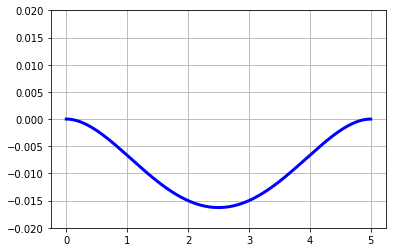

In [4]:
x = linspace(0,5, 1001)
plot(x, utrue(x), 'b', linewidth = '3')
ylim(-0.02,0.02)
grid(True)

The above plot confirms that we got the expected solution since the plot matches the plot provided in the question. 

# Discretization of the fourth derivative: 


We add the following code to suppress warnings that occur when adding new nonzeros in a crc matrix. 

In [5]:
import logging
logging.captureWarnings(True)

In [6]:
def solve(f, ainfo, binfo, m):
    """Solves the following problem: u''''(x) = f(x) with 2 Dirichlet and 2 Neumann boundary conditions
    Inputs:
        f is a function defining the right hand side,
        ainfo = (ax, a0, a1) defines the Dirchlet boundary condtion u(ax) =a0
        and the Neumann boundary condition u'(ax) =a0
        binfo = (bx, b0, b1) defines the Dirichlet boundary condition u(bx) =b0 
        and the Neumann boundary condition u'(bx) = b0
        m is the number of (equally spaced) grid points to use 
    
    Returns: 
        x = array of grid points (including boundaries, so of length m+2)
        u = array of approximate solution at these points.
    """
    from scipy.sparse import diags
    from scipy.sparse.linalg import spsolve
    
    ax, a0, a1 = ainfo
    bx, b0, b1 = binfo

    h = (bx-ax)/(m+1)            # delta x 
    x = linspace(ax,bx,m+2)      # array of grid points x[0] = ax and x[m+1] = bx
    
    # setting up m x m diagonal matrix A
    em = ones(m)
    em1 = ones(m-1)
    em2 = ones(m-2)
    A = diags([em2, -4*em1,  6*em, -4*em1, 
               em2],[-2, -1, 0, 1, 2], format = 'csc')
    
    
    # fixing the first row
    A[0, 0] = -2
    A[0,1] = (1/2)
    A[0,2] = 0

    # fixing the last row
    A[-1,-1] = -2
    A[-1, -2] = (1/2)
    A[-1,-3] = 0
    
    A = A/(h**4)
  
    # Right hand side
    b = f(x)
    b[1] = (-(a1*h)-(3/2)*a0)/(h**4)
    b[2] = (b[2] -(a0/(h**4)))
    b[m-1] = b[m-1]- (b0/(h**4))
    b[m] = ((b1*h) - (3/2)*b0)/(h**4)
    rhs = b[1:-1]

    uint = spsolve(A,rhs)
    u = hstack([a0, uint, b0])
    return x,u

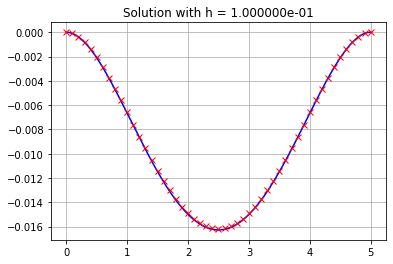

In [7]:
f = lambda x: -0.01 +x*0
m = 49
ax = 0.; a0 = 0.; a1 = 0.;ainfo = (ax, a0,a1)
bx = 5.; b0 = 0.; b1 = 0.;binfo = (bx, b0,b1)
h = (bx-ax)/(m+1)
x,u = solve(f, ainfo, binfo, m)
xfine = linspace(ax, bx, 1001)
ufine = utrue(xfine) 
plot(xfine, ufine, 'b')
plot(x, u, 'rx')
title('Solution with h = %3e' % h)
grid(True)

The solution using the approxmation looks to fit the exact solution quite well. However, this is only for a specific grid and so in what proceeds we will test using a series of grids and produce a log-log plot to verify the expected accuracy. 

In [8]:
# values of m+1:
mp1_vals = array([50, 100, 200, 400, 1000, 10000, 100000, 1000000])
h_vals = (bx - ax) / mp1_vals   # correspoinding h values

errors = []
print('\n    h                 error ')
for jtest in range(len(mp1_vals)):
    m = mp1_vals[jtest] - 1
    h = h_vals[jtest]
    x,u = solve(f, ainfo, binfo, m)
    
    x_true = linspace(ax, bx, m+2)
    u_true = utrue(x_true)
    error_max = abs(u - u_true).max()
    errors.append(error_max)
    print('%10.8f   %20.16f' % (h,error_max))



    h                 error 
0.10000000     0.0001010416666104
0.05000000     0.0000256510404433
0.02500000     0.0000064615701384
0.01250000     0.0000016211935255
0.00500000     0.0000002602143173
0.00050000     0.0000804780750246
0.00005000     0.0163328968316393
0.00000500     0.0162760597737315


Text(0.5, 1.0, 'Log-log plot of errors')

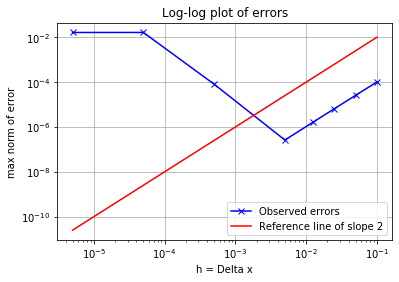

In [9]:
loglog(h_vals, errors, 'bx-', label='Observed errors')
grid(True)
xlabel('h = Delta x')
ylabel('max norm of error')

eref = h_vals**2
loglog(h_vals, eref, 'r-', label='Reference line of slope 2')
legend(loc='lower right')
title('Log-log plot of errors')

We have a log-log plot of h vs the max norm error. We see that the observed errors have the same slope as the reference line until a certain threshold for $h$. The reference line has slope 2 because that is what expect for a second order accurate method. We can see that beyond a certain value of $h$, the rounding error takes over and the max norm of the error will start to increase. However, until the threshold the errors seem to behave in an expected fashion, that is, error $\approx {\cal O}(h^2)$. More expanation of the plot is provided in the Latex PDF. 

# Problem 2:

We want to test our code more and to do so we will use the method of manufactured solutions. We want to solve $u''''(x) = f(x)$ on the interval $0 \leq x \leq 1$ with the function $f(x)$ and boundary
conditions on $u(0),~u'(0),~u(1),$ and $u'(1)$ chosen so that the true
solution is $u(x) = 2 + 3x + x^5$. The true solution allows us to calculate $f(x)$ and the boundary conditions which we can then feed into the program to check whether it returns $u(x) = 2+3x+x^5$ on a grid. Given, $u(x) = 2 + 3x + x^5$ we have that $u(0) = 2$, $u(1) = 6$, $u'(0) = 3$ and $u'(1) = 8$. Also, $f(x) = 120x$. 

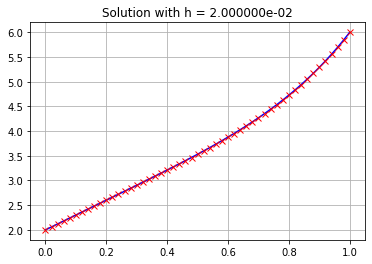

In [10]:
f = lambda x: 120*x
m = 49
ax = 0.; a0 = 2.; a1 = 3.;ainfo = (ax, a0,a1)
bx = 1.; b0 = 6.; b1 = 8.;binfo = (bx, b0,b1)
h = (bx-ax)/(m+1)
x,u = solve(f, ainfo, binfo, m)
utrue_new = lambda x: (x**5)+(3*x)+2
xfine = linspace(ax, bx, 10000)
ufine = utrue_new(xfine)
plot(xfine, ufine, 'b')
plot(x, u, 'rx')
title('Solution with h = %3e' % h)
grid(True)


The blue line is the actual solution $u(x) = 2+3x+x^5$. The red marks are the solution we find using the method of manufactured solutions. Again, we see that our computed solution matches the true solution quite well. However, this is for particular $m$ and therefore a particular $h$. In the next step, we test the code for multiple values of $h$ and plot a log-log plot of errors vs $h$ to see if we are able to obtain the expected errors. 

In [11]:
# values of m+1:
mp1_vals = array([50, 100, 200, 400, 1000, 10000, 100000, 1000000])
h_vals = (bx - ax) / mp1_vals   # correspoinding h values

errors = []
print('\n    h                 error ')
for jtest in range(len(mp1_vals)):
    m = mp1_vals[jtest] - 1
    h = h_vals[jtest]
    x,u = solve(f, ainfo, binfo, m)
    
    x_true = linspace(ax, bx, m+2)
    u_true = utrue_new(x_true)
    error_max = abs(u - u_true).max()
    errors.append(error_max)
    print('%10.8f   %20.16f' % (h,error_max))



    h                 error 
0.02000000     0.0011498946458968
0.01000000     0.0002918700631609
0.00500000     0.0000735200729105
0.00250000     0.0000184507548369
0.00100000     0.0000015734472401
0.00010000     0.0378321008471514
0.00001000     9.1217828818427868
0.00000100    27.2197059213809922


Text(0.5, 1.0, 'Log-log plot of errors')

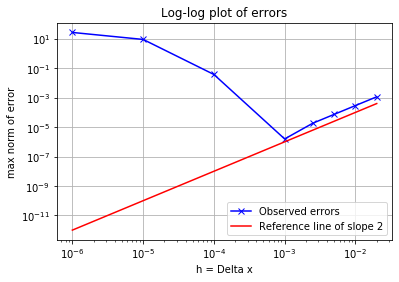

In [12]:
loglog(h_vals, errors, 'bx-', label='Observed errors')
grid(True)
xlabel('h = Delta x')
ylabel('max norm of error')

eref = h_vals**2
loglog(h_vals, eref, 'r-', label='Reference line of slope 2')
legend(loc='lower right')
title('Log-log plot of errors')

The observed errors have the same slope as the reference line until a certain value of $h$. After this value of $h$, the error drops further for some smaller values of $h$. However, decreasing $h$ further leads to the rounding error taking over. Once the rounding error takes over the error starts increasing. However, up until a certain value of $h$ the errors do take the expected form. 